# Function Transformation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\loan (1).csv")
print(data.head(1))

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001002   Male      No          0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  


C:\Users\HP\AppData\Local\Temp\ipykernel_4796\3733718079.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])


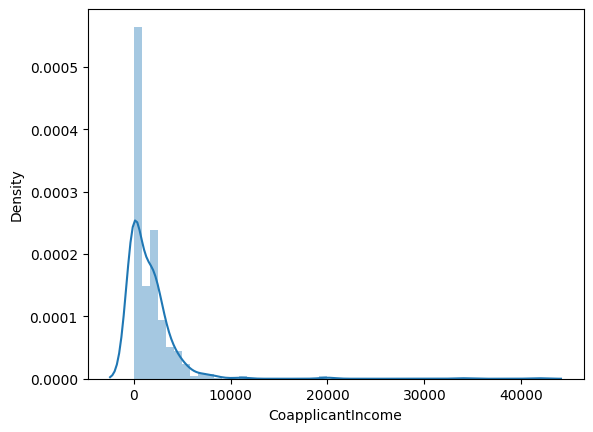

In [3]:
sns.distplot(data["CoapplicantIncome"])
plt.show()

In [4]:
min_range=data["CoapplicantIncome"].mean() - (3*data["CoapplicantIncome"].std())
max_range=data["CoapplicantIncome"].mean() + (3*data["CoapplicantIncome"].std())

In [5]:
print(min_range)
print(max_range)

-7157.4993096454655
10399.990905699668


In [6]:
data=data[data["CoapplicantIncome"]<max_range]

In [7]:
from sklearn.preprocessing import FunctionTransformer

In [8]:
ft=FunctionTransformer(func=np.log1p)
ft.fit(data[["CoapplicantIncome"]])

,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<ufunc 'log1p'>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to func... versionadded:: 0.18",None
,"inv_kw_args inv_kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to inverse_func... versionadded:: 0.18",None


In [9]:
data["CoapplicantIncome_ft"]=ft.transform(data[["CoapplicantIncome"]])

C:\Users\HP\AppData\Local\Temp\ipykernel_4796\130734099.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"])
C:\Users\HP\AppData\Local\Temp\ipykernel_4796\130734099.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome_ft"])


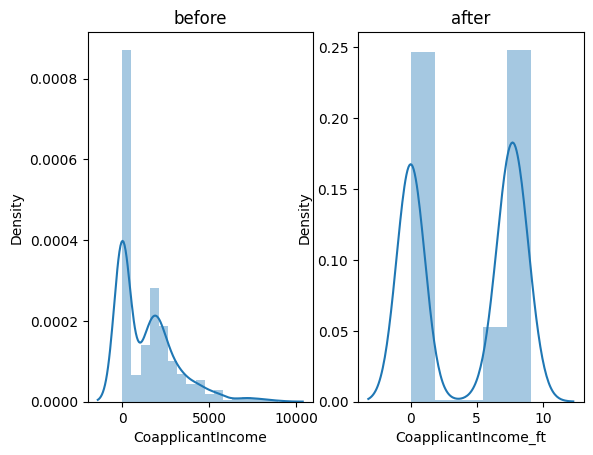

In [11]:
plt.subplot(1,2,1)
sns.distplot(data["CoapplicantIncome"])
plt.title("before")

plt.subplot(1,2,2)
sns.distplot(data["CoapplicantIncome_ft"])
plt.title("after")    
plt.show()